## soal 1

Pt.Cofi sedang melakukan sebuah project, senior Data Scientist telah melakukan clustering menggunakan model K-means. setelah di clusering kalian diminta tolong oleh Senior kalian untuk melanjutkan project ini. Anda sebagai Data Junior Scientist diminta untuk melakukan eksplore terhadap data yang ada untuk menentukan arti dari tiap tiap cluster yang ada.
berikut adalah keterangan dari tiap column

https://search.r-project.org/CRAN/refmans/HSAUR3/html/USairpollution.html

note:
1. Kalian dibebaskan untuk melakukan visualisasi apapun, serta menjabarkan apa saja yang anda temukan.
2. Tujuan akhir dari soal ini adalah pengelompokan dari tiap cluster yang ada.
3. Disarankan juga mencari informasi dari luar (browsing google).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('USairpollution_quiz2.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      41 non-null     object 
 1   SO2       41 non-null     int64  
 2   temp      41 non-null     float64
 3   manu      41 non-null     int64  
 4   popul     41 non-null     int64  
 5   wind      41 non-null     float64
 6   precip    41 non-null     float64
 7   predays   41 non-null     int64  
 8   clusters  41 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 3.0+ KB


In [9]:
df.sample(5)

,City,SO2,temp,manu,popul,wind,precip,predays,clusters
28,Omaha,14,51.5,181,347,10.9,30.18,98,4
29,Philadelphia,69,54.6,1692,1950,9.6,39.93,115,2
38,Washington,29,57.3,434,757,9.3,38.89,111,1
33,Richmond,26,57.8,197,299,7.6,42.59,115,1
1,Albuquerque,11,56.8,46,244,8.9,7.77,58,0


In [10]:
num_df = df.select_dtypes(include=[np.number])
cat_df = df.select_dtypes(exclude=[np.number])

In [12]:
num_df.describe()

,SO2,temp,manu,popul,wind,precip,predays,clusters
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,30.048780,55.763415,463.097561,608.609756,9.443902,36.769024,113.902439,1.926829
std,23.472272,7.227716,563.473948,579.113023,1.428644,11.771550,26.506419,1.367301
min,8.000000,43.500000,35.000000,71.000000,6.000000,7.050000,36.000000,0.000000
25%,13.000000,50.600000,181.000000,299.000000,8.700000,30.960000,103.000000,1.000000
50%,26.000000,54.600000,347.000000,515.000000,9.300000,38.740000,115.000000,1.000000
75%,35.000000,59.300000,462.000000,717.000000,10.600000,43.110000,128.000000,3.000000
max,110.000000,75.500000,3344.000000,3369.000000,12.700000,59.800000,166.000000,4.000000


In [14]:
cat_df.describe()

,City
count,41
unique,41
top,Albany
freq,1


<AxesSubplot:>

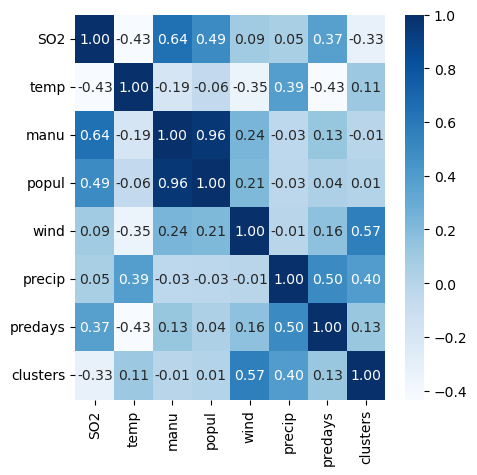

In [54]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Berdasarkan pengamatan pada corr heatmap diatas dapat disimpulkan ada 4 faktor yang dapat mempengaruhi SO2 secara siginifikan, yakni: manufaktur, populasi, predays, dan temp(secara negatif).**

**Pengaruh suhu udara, hujan, kecepatan angin: https://gawpalu.id/index.php/informasi/kimia-atmosfer/gas-reaktif/sulfur-dioksida**

Text(0.5, 1.0, 'Clusters with High SO2')

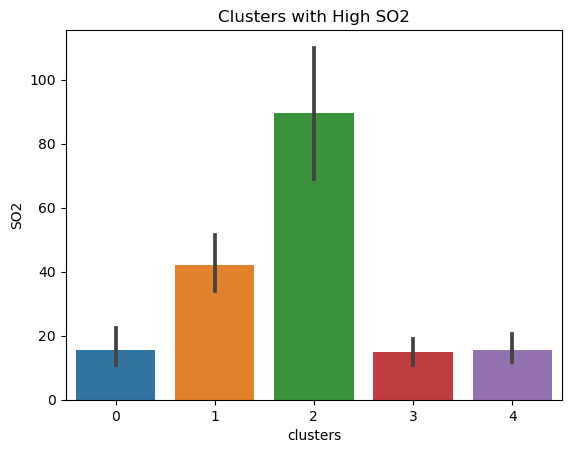

In [53]:
sns.barplot(x='clusters', y='SO2', data=df)
plt.title("Clusters with High SO2")

**Cluster 2 adalah cluster dengan SO2 tertinggi**

Text(0.5, 1.0, 'Clusters with High Manu')

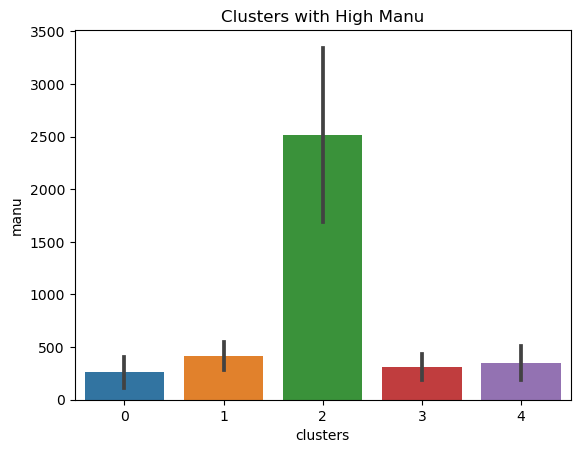

In [39]:
sns.barplot(x='clusters', y='manu', data=df)
plt.title("Clusters with High Manu")

**Cluster 2 adalah cluster dengan manufaktur tertinggi**

Text(0.5, 1.0, 'Clusters with High Popul')

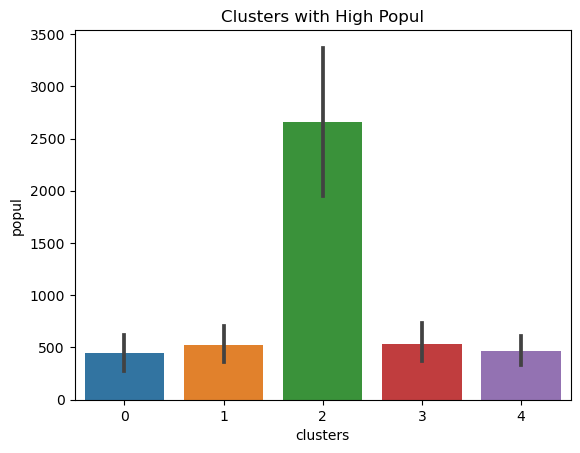

In [40]:
sns.barplot(x='clusters', y='popul', data=df)
plt.title("Clusters with High Popul")

**Cluster 2 adalah cluster dengan populai tertinggi**

Text(0.5, 1.0, 'Clusters with High Predays')

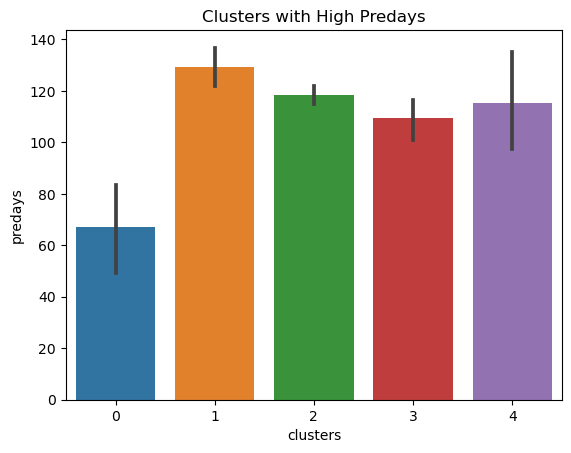

In [58]:
sns.barplot(x='clusters', y='predays', data=df)
plt.title("Clusters with High Predays")

**Cluster 1 adalah cluster dengan predays tertinggi**

Text(0.5, 1.0, 'Clusters with High Wind')

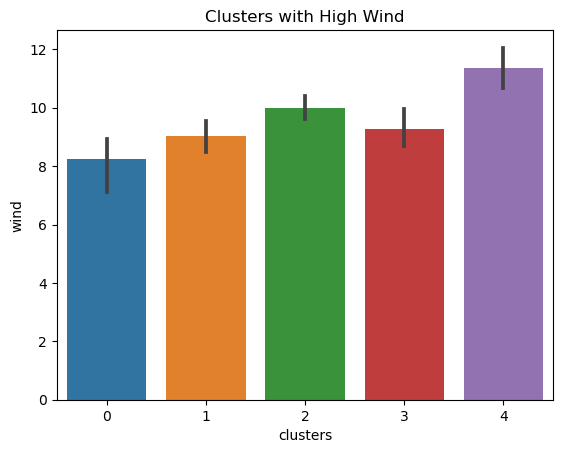

In [41]:
sns.barplot(x='clusters', y='wind', data=df)
plt.title("Clusters with High Wind")

**Cluster 4 adalah cluster dengan wind tertinggi**

Text(0.5, 1.0, 'Clusters with High Precip')

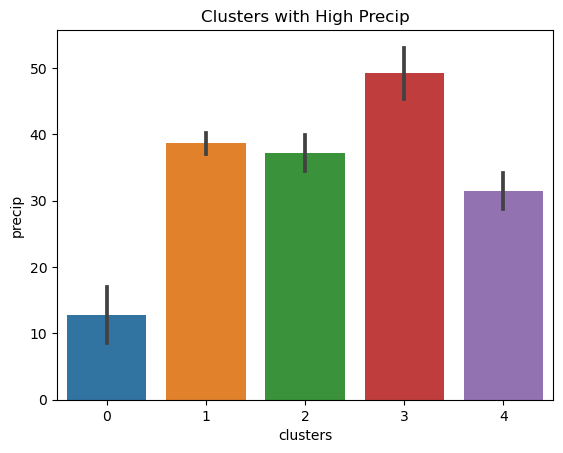

In [42]:
sns.barplot(x='clusters', y='precip', data=df)
plt.title("Clusters with High Precip")

**Cluster 3 adalah cluster dengan precip tertinggi**

Text(0.5, 1.0, 'Clusters with High Temp')

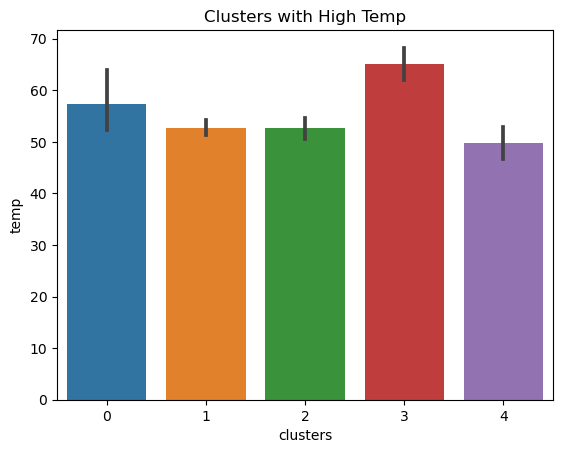

In [56]:
sns.barplot(x='clusters', y='temp', data=df)
plt.title("Clusters with High Temp")

**Cluster dengan suhu tertinggi adalah 3**

## pengelompokan dari tiap cluster yang ada

**- Cluster_0: Cukup Aman**

Adalah cluster yang memiliki tingkat SO2 dalam kategori rendah. Terdiri dari kota degan manufaktur dan populasi penduduk yang rendah. Kecepatan angin dan curah hujannya tergolong rendah, temperatur termasuk dalam kategori tinggi

**- Cluster_1: Hati-hari**

Adalah cluster yang memiliki tingkat SO2 dalam kategori tinggi setelah cluster 2. Terdiri dari kota degan manufaktur dan populasi penduduk yang rendah juga. Kecepatan angin sedang, curah hujan tinggi, temperatur sedang

**- Cluster_2: Bahaya**

Adalah cluster yang memiliki tingkat SO2 paling tinggi (Paling tercemar). Terdiri dari kota degan manufaktur dan populasi penduduk yang paling tinggi. Diperburuk dengan kecepatan angin dan curah hujannya tergolong sedang ke tinggi sehingga dapat menghasilkan atau menyebarkan S02, temperatur sedang

**- Cluster_3: Sangat Aman**

Adalah cluster yang memiliki tingkat SO2 dalam kategori palingrendah. Terdiri dari kota degan manufaktur dan populasi penduduk yang rendah. Kecepatan angin dan curah hujannya tergolong rendah, temperatur paling tinggi

**- Cluster_4: Aman**

Adalah cluster yang memiliki tingkat SO2 dalam kategori rendah. Terdiri dari kota degan manufaktur dan populasi penduduk yang rendah. Kecepatan angin paling tinggi dan curah hujannya tergolong tinnggi, temperatur sedang

In [6]:
#your journey & code Start here, Good luck!!!